In [1]:
import pandas as pd
import matplotlib.pylab as plt
import sqlite3

# Working with Data 

So far, you still may see python as a powerful calculator, however, it is so much more. One important tool is to import data, manipulate it, analyze and export it. Several libraries offer useful tools to work with data in order to allow for a meaningful analysis. One of the most popular and powerful is [**Pandas**](https://pandas.pydata.org/pandas-docs/stable/index.html). Beside including efficient ways for cleaning and manipulating data, pandas also includes functions for statistical analysis and graphics.

Usually, pandas is imported under the alias ```pd```.

## Pandas - DataFrames and Series

### Indexing
The basic elements for data are *DataFrames* and *Series*. A DataFrame is a whole matrix- or table-like representation of data with column and row names. A Series can be understood as a single column of such a data matrix (but without the need for a table). There are respective functions to turn other objects, e.g. lists or dicts, into DataFrames or Series. Indexing, similar to lists or dicts, uses square brackets.

In [2]:
my_list = [1,2,3,4,5,6,7]
my_df = pd.DataFrame(my_list, columns=['var1'])
print('df:\n', my_df)

my_series = pd.Series(my_list)
print('series:\n',my_series)

# selecting a single column from a DataFrame
print('select column from df:\n', my_df['var1'])

df:
    var1
0     1
1     2
2     3
3     4
4     5
5     6
6     7
series:
 0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64
select column from df:
 0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: var1, dtype: int64


To select specific rows or columns, the ```iloc``` method, for selecting based on an index, and ```loc``` method, based on labels, are recommended. Especially when several columns are to be selected. Indexing can also be done by boolean Series (or lists) and thus conditionally. Another way to select a single column is by chaining the column's name to the DataFrame's name by a dot (like in method chaining).

In [3]:
my_df = pd.DataFrame(
{'age': [20, 34, 56],
 'height': [183, 179, 172]
}, index=['person_a', 'person_b', 'person_c'])
print(my_df)
print('1.:', my_df.loc['person_b','age'], 'is the same as',  my_df.iloc[1,0])

# age > 27
print('indexing by condition/list\n', my_df.loc[my_df.age >27], '\ncorresponds to \n', my_df.loc[[False, True, True]])
print(type(my_df.age >27))

          age  height
person_a   20     183
person_b   34     179
person_c   56     172
1.: 34 is the same as 34
indexing by condition/list
           age  height
person_b   34     179
person_c   56     172 
corresponds to 
           age  height
person_b   34     179
person_c   56     172
<class 'pandas.core.series.Series'>


### Useful Methods

Pandas includes many useful methods that will help you get to know and manipulate a dataset. Some of these methods are shown in the following, others are introduced later when needed.\
More often than not, a dataset will contain missing values, i.e. cells in a data table contain no value. They will be depicted as ```NaN```, **N**ot **a** **N**umber.

In [4]:
import numpy as np
my_df =  pd.DataFrame(
{'age': [20, 34, 56, np.nan, 44],
 'height': [183, 179, np.nan,  163, np.nan]
})
my_df

,age,height
0,20.0,183.0
1,34.0,179.0
2,56.0,NaN
3,NaN,163.0
4,44.0,NaN


In [5]:
# view the first rows (view last rows with .tail())
print('0.\n', my_df.head(n=5))

# general information
print('\n1.')
my_df.info()

# descriptive statistsics on dataset
print('\n2.\n',my_df.describe())

# number of missing values per column
print('\n3.\n',my_df.isnull().sum())

# single statistics are included as methods, also for single columns
print('\n4.\n', my_df.age.mean())

# fill missing values (e.g. with mean of column)
print('\n 5.\n', my_df.fillna(my_df.mean()))    

# note that you must assign this to my_df (or a different variable) in order to impute missing values permanently!
my_df = my_df.fillna(my_df.mean())

# sort values by column(s)
print('\n6.\n', my_df.sort_values(by=['height']))    

# get column names (useful for looping)
print('7.\n', my_df.columns)

# drop rows containing missing values
print('8.\n', my_df.dropna()) 

# drop rows or columns
print('9.\n', my_df.drop(['age'], axis=1))

# merge DataFrames (automatically on shared variable if not specified otherwise)
df2 = pd.DataFrame(
{'age': [20, 34, 56, np.nan, 44],
 'weight': [83, 63, 98,  50, 77]
})
print('10.\n', my_df.merge(df2))
my_df = my_df.merge(df2)

# correlation matrix
print('11.\n', my_df.corr())

# adding new columns
my_df = my_df.assign(bmi = my_df.weight/(my_df.height/100)**2)
my_df

0.
     age  height
0  20.0   183.0
1  34.0   179.0
2  56.0     NaN
3   NaN   163.0
4  44.0     NaN

1.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      float64
 1   height  3 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes

2.
              age      height
count   4.000000    3.000000
mean   38.500000  175.000000
std    15.264338   10.583005
min    20.000000  163.000000
25%    30.500000  171.000000
50%    39.000000  179.000000
75%    47.000000  181.000000
max    56.000000  183.000000

3.
 age       1
height    2
dtype: int64

4.
 38.5

 5.
     age  height
0  20.0   183.0
1  34.0   179.0
2  56.0   175.0
3  38.5   163.0
4  44.0   175.0

6.
     age  height
3  38.5   163.0
2  56.0   175.0
4  44.0   175.0
1  34.0   179.0
0  20.0   183.0
7.
 Index(['age', 'height'], dtype='object')
8.
     age  height
0  20.0   183.0
1

,age,height,weight,bmi
0,20.0,183.0,83,24.784258
1,34.0,179.0,63,19.662308
2,56.0,175.0,98,32.000000
3,44.0,175.0,77,25.142857


As a last tool in this section, we will look at the ```get_dummies()``` function. Dummy variables are used to encode categorical variables with zero and one, for example in order to calculate the correlation with some other numerical variable.

In [6]:
df3 = pd.DataFrame(
{'hair': ['blonde', 'black', 'red', 'red', 'black']
})

print(pd.get_dummies(df3.hair))

   black  blonde    red
0  False    True  False
1   True   False  False
2  False   False   True
3  False   False   True
4   True   False  False


### Plots
Methods for standard pot types are available. For a histogram of the data, just use ```.hist()```. Other types are available by chaining ```.plot.``` and the plot type. 

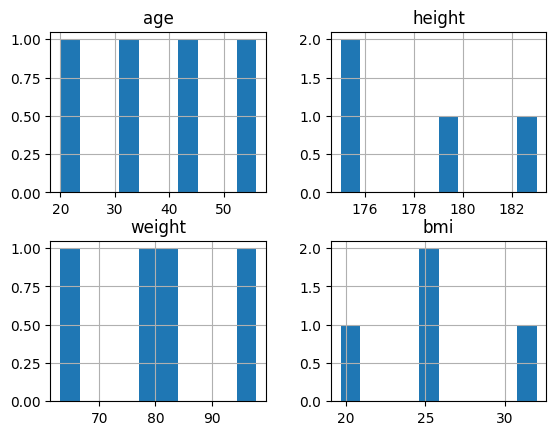

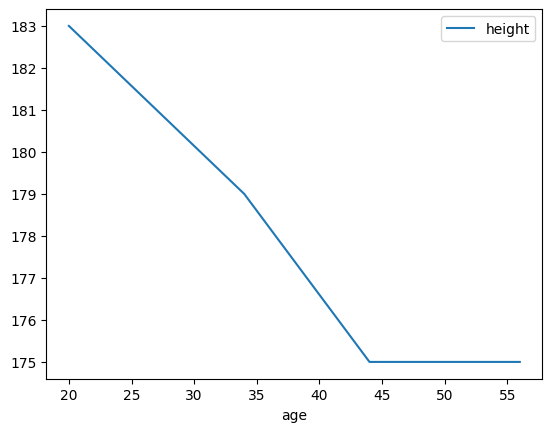

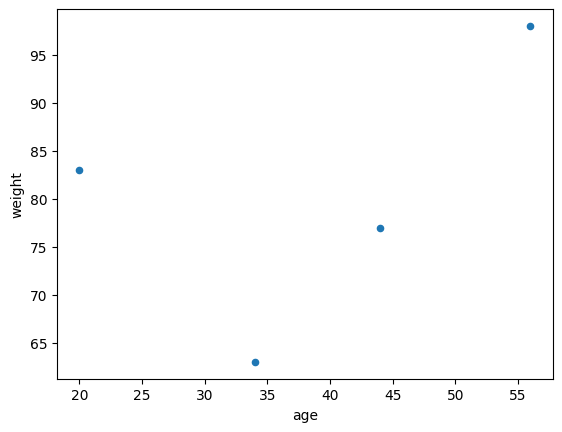

In [7]:
# histogram
my_df.hist()
plt.show()

# lineplot
my_df.sort_values(by='age').plot.line(x='age', y='height')
plt.show()

# scatter plot
my_df.plot.scatter(x='age', y='weight')
plt.show()

### Importing and Exporting Data

Your data may come to you in various file formats. Pandas enables you to import data from all common formats. The respective functions are usually called ```read_``` and ```to_``` followed by the respective file type. To read a *.csv* for example, use the ```read_csv()``` function. Note that the file need not to be stored locally on your computer.

In [8]:
russell = pd.read_csv('../data/close_prices_rua.csv')
print(russell.head())
print(russell.tail())

         Date         Open         High          Low        Close  \
0  2022-01-03  2788.020020  2804.939941  2783.040039  2804.929932   
1  2022-01-04  2788.020020  2817.110107  2783.040039  2800.409912   
2  2022-01-05  2799.729980  2801.260010  2738.939941  2739.340088   
3  2022-01-06  2739.229980  2756.689941  2721.560059  2739.199951   
4  2022-01-07  2739.060059  2748.270020  2718.560059  2725.600098   

     Adj Close  Volume  
0  2804.929932       0  
1  2800.409912       0  
2  2739.340088       0  
3  2739.199951       0  
4  2725.600098       0  
           Date         Open         High          Low        Close  \
533  2024-02-16  2885.469971  2890.629883  2870.000000  2882.639893   
534  2024-02-20  2859.389893  2862.790039  2842.050049  2853.409912   
535  2024-02-21  2845.770020  2855.149902  2834.800049  2854.620117   
536  2024-02-22  2877.489990  2915.370117  2876.699951  2911.399902   
537  2024-02-23  2919.000000  2923.610107  2908.379883  2913.219971   

       A

Lets do some exploration and manipulation of the historical data from the Russell 3000 index we just imported.

In [9]:
print(f'Dimensionality of the data frame: {russell.shape}\n')
print(russell.info())    # the 'Date' column is of dtype object 

Dimensionality of the data frame: (538, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       538 non-null    object 
 1   Open       538 non-null    float64
 2   High       538 non-null    float64
 3   Low        538 non-null    float64
 4   Close      538 non-null    float64
 5   Adj Close  538 non-null    float64
 6   Volume     538 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 29.6+ KB
None


In [10]:
# check type of first entry in 'Date'
print(type(russell.Date[0]))

<class 'str'>


The date is currently in string format, let us transform it to *datetime*, a special type for dates in python.

In [11]:
russell['Datetime'] = pd.to_datetime(russell.Date)
print(russell.Datetime.head())    # check dtype now

0   2022-01-03
1   2022-01-04
2   2022-01-05
3   2022-01-06
4   2022-01-07
Name: Datetime, dtype: datetime64[ns]


In [12]:
print(f"The column names are: \n{russell.columns}")

The column names are: 
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Datetime'],
      dtype='object')


In [13]:
print(f'There are a total of {russell.isnull().sum().sum()} missing values in the data set')

There are a total of 0 missing values in the data set


<Axes: xlabel='Datetime'>

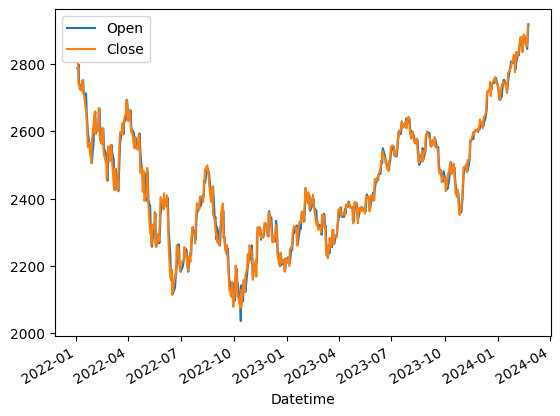

In [14]:
russell.plot(x='Datetime', y=['Open', 'Close'])    # using Datetime for plotting

The ```describe``` method offers some descriptive statistics of the data set.

In [15]:
russell.describe()

,Open,High,Low,Close,Adj Close,Volume,Datetime
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.0,538
mean,2445.081027,2461.713682,2427.139280,2445.296892,2445.296892,0.0,2023-01-27 15:07:21.635687680
min,2035.680054,2091.870117,2026.229980,2076.070068,2076.070068,0.0,2022-01-03 00:00:00
25%,2308.085022,2322.982422,2283.952393,2304.890015,2304.890015,0.0,2022-07-18 06:00:00
50%,2417.375000,2436.104980,2398.869995,2418.340088,2418.340088,0.0,2023-01-28 12:00:00
75%,2577.137451,2594.047424,2562.204956,2577.842590,2577.842590,0.0,2023-08-10 18:00:00
max,2919.000000,2923.610107,2908.379883,2913.219971,2913.219971,0.0,2024-02-23 00:00:00
std,181.644747,179.224093,184.264154,182.332170,182.332170,0.0,NaN


For statistics on one variable, index the result as usual. 

In [16]:
mean_open = russell.describe().loc['mean', 'Open']
print(f"The average opening price is: {mean_open:.2f}")

The average opening price is: 2445.08


Create a new column, with a flag if the closing price was higher than the opening price.

In [17]:
russell = russell.assign(positive = russell.Close > russell.Open)
print(russell.head())

# fraction of days when this was the case
print(f'\nFraction of positive days: {russell.positive.mean():.4f}\n')
print('\ncheck: \n', russell.positive.value_counts())

         Date         Open         High          Low        Close  \
0  2022-01-03  2788.020020  2804.939941  2783.040039  2804.929932   
1  2022-01-04  2788.020020  2817.110107  2783.040039  2800.409912   
2  2022-01-05  2799.729980  2801.260010  2738.939941  2739.340088   
3  2022-01-06  2739.229980  2756.689941  2721.560059  2739.199951   
4  2022-01-07  2739.060059  2748.270020  2718.560059  2725.600098   

     Adj Close  Volume   Datetime  positive  
0  2804.929932       0 2022-01-03      True  
1  2800.409912       0 2022-01-04      True  
2  2739.340088       0 2022-01-05     False  
3  2739.199951       0 2022-01-06     False  
4  2725.600098       0 2022-01-07     False  

Fraction of positive days: 0.5037


check: 
 positive
True     271
False    267
Name: count, dtype: int64


Extract same fraction for every day in the week. Days are counted from 0 (Monday) to 6 (Sunday). 

In [18]:
for i in range(7):
    print(f'day {i}: ', russell[russell.Datetime.dt.dayofweek == i].positive.mean())

day 0:  0.5894736842105263
day 1:  0.4774774774774775
day 2:  0.4732142857142857
day 3:  0.4909090909090909
day 4:  0.5
day 5:  nan
day 6:  nan


A more straight forward way using built-in methods.

In [19]:
russell = russell.assign(wday = russell.Datetime.dt.dayofweek)
russell.groupby(['wday']).mean(numeric_only=True)  # rows with nans are not calculated

,Open,High,Low,Close,Adj Close,Volume,positive
wday,,,,,,,
0,2440.842010,2455.321464,2425.519058,2442.503994,2442.503994,0.0,0.589474
1,2445.384592,2461.678828,2428.299915,2445.511004,2445.511004,0.0,0.477477
2,2446.786429,2464.452593,2429.186787,2445.830087,2445.830087,0.0,0.473214
3,2445.827283,2463.293009,2425.210918,2445.252714,2445.252714,0.0,0.490909
4,2445.953007,2462.901369,2427.211006,2446.994172,2446.994172,0.0,0.500000


## Database and SQL

Beside CSV (or Excel) files, another way to work with data is using databases. From there, data can be accessed using a query language. A very common one for relational databases is **SQL** (**S**tructured **Q**uery **L**anguage). It allows to extract specific records, i.e. records which meet special requirements, from a database using single commands. Structured databases usually include more than one table with data.

### Store in Database
First, saving a data frame to a database is conveniently done with a built-in method in Pandas. However, to access a database, a connection must first be established and we need to use SQL. In the following, we will use the **sqlite3** package for working with a database. An alternative is given by the **sqlalchemy** package.

Let us exampe all table names within the database:

In [20]:
import sqlite3

conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
table_names = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
conn.close()
print(table_names)

           name
0  company_info
1     adj_close
2          high
3           low
4        volume


Now, let us examine a table, e.g., the *company_info*. To get a first impression, we can use the ```pd.read_sql``` method and grab the first five observations. This shows us the columns names and provides a first impression of the data. To do so, a query can be sent to get the required data from the database to a dataframe.
By convention, SQL is written in all CAPS, even though this is not required for the statement to work.

To select all columns from a table, the wildcard character ```*``` is used. The syntax is ```SELECT <col1>, <col2> FROM <table>```. The ```LIMIT 5``` limits data retrieval to the first five observations. Omit this if you want to grab all data.

In [21]:
conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
df = pd.read_sql("SELECT * FROM company_info LIMIT 5;", conn, index_col="index")
conn.close()
df

,Symbol,Name,Market Cap,IPO Year,Volume,Sector,Industry,cik,ticker,title,as_of_date
index,,,,,,,,,,,
0,AACG,ATA Creativity Global American Depositary Shares,4.237371e+07,2008.0,6388,Real Estate,Other Consumer Services,0001420529,AACG,ATA Creativity Global,2024-02-22 19:35:15.357874
2,AADI,Aadi Bioscience Inc. Common Stock,4.586336e+07,NaN,147594,Health Care,Biotechnology: Pharmaceutical Preparations,0001422142,AADI,"Aadi Bioscience, Inc.",2024-02-22 19:35:15.357874
3,AAGR,African Agriculture Holdings Inc. Common Stock,2.012500e+07,2021.0,56344,Finance,Finance: Consumer Services,0001848898,AAGR,African Agriculture Holdings Inc.,2024-02-22 19:35:15.357874
4,AAL,American Airlines Group Inc. Common Stock,9.665880e+09,NaN,23032392,Consumer Discretionary,Air Freight/Delivery Services,0000006201,AAL,American Airlines Group Inc.,2024-02-22 19:35:15.357874
5,AAME,Atlantic American Corporation Common Stock,5.263790e+07,NaN,1520,Finance,Life Insurance,0000008177,AAME,ATLANTIC AMERICAN CORP,2024-02-22 19:35:15.357874


We could also do this without the pandas method.

In [22]:
conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
retrieval = out = conn.execute("SELECT * FROM company_info LIMIT 5;")
out = retrieval.fetchall()
conn.close()
out

[(0,
  'AACG',
  'ATA Creativity Global American Depositary Shares',
  42373708.0,
  2008.0,
  6388,
  'Real Estate',
  'Other Consumer Services',
  '0001420529',
  'AACG',
  'ATA Creativity Global',
  '2024-02-22 19:35:15.357874'),
 (2,
  'AADI',
  'Aadi Bioscience Inc. Common Stock',
  45863358.0,
  None,
  147594,
  'Health Care',
  'Biotechnology: Pharmaceutical Preparations',
  '0001422142',
  'AADI',
  'Aadi Bioscience, Inc.',
  '2024-02-22 19:35:15.357874'),
 (3,
  'AAGR',
  'African Agriculture Holdings Inc. Common Stock',
  20125000.0,
  2021.0,
  56344,
  'Finance',
  'Finance: Consumer Services',
  '0001848898',
  'AAGR',
  'African Agriculture Holdings Inc.',
  '2024-02-22 19:35:15.357874'),
 (4,
  'AAL',
  'American Airlines Group Inc. Common Stock',
  9665879525.0,
  None,
  23032392,
  'Consumer Discretionary',
  'Air Freight/Delivery Services',
  '0000006201',
  'AAL',
  'American Airlines Group Inc.',
  '2024-02-22 19:35:15.357874'),
 (5,
  'AAME',
  'Atlantic American

To select specific columns only, the can be listed, separated by a comma.

In [23]:
conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
df = pd.read_sql("SELECT Symbol, Name, Sector FROM company_info LIMIT 5;", conn)
conn.close()
df

,Symbol,Name,Sector
0,AACG,ATA Creativity Global American Depositary Shares,Real Estate
1,AADI,Aadi Bioscience Inc. Common Stock,Health Care
2,AAGR,African Agriculture Holdings Inc. Common Stock,Finance
3,AAL,American Airlines Group Inc. Common Stock,Consumer Discretionary
4,AAME,Atlantic American Corporation Common Stock,Finance


The dataset can be filtered before being loaded into a dataframe. To pose restrictions on the import of records, use ```WHERE``` after the table name.

In [24]:
conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
df = pd.read_sql("SELECT * FROM company_info WHERE Volume > 10000 LIMIT 5;", conn, index_col="index")
conn.close()
df

,Symbol,Name,Market Cap,IPO Year,Volume,Sector,Industry,cik,ticker,title,as_of_date
index,,,,,,,,,,,
2,AADI,Aadi Bioscience Inc. Common Stock,4.586336e+07,NaN,147594,Health Care,Biotechnology: Pharmaceutical Preparations,0001422142,AADI,"Aadi Bioscience, Inc.",2024-02-22 19:35:15.357874
3,AAGR,African Agriculture Holdings Inc. Common Stock,2.012500e+07,2021.0,56344,Finance,Finance: Consumer Services,0001848898,AAGR,African Agriculture Holdings Inc.,2024-02-22 19:35:15.357874
4,AAL,American Airlines Group Inc. Common Stock,9.665880e+09,NaN,23032392,Consumer Discretionary,Air Freight/Delivery Services,0000006201,AAL,American Airlines Group Inc.,2024-02-22 19:35:15.357874
6,AAOI,Applied Optoelectronics Inc. Common Stock,6.819469e+08,2013.0,2534547,Technology,Semiconductors,0001158114,AAOI,"APPLIED OPTOELECTRONICS, INC.",2024-02-22 19:35:15.357874
7,AAON,AAON Inc. Common Stock,6.654766e+09,NaN,396290,Industrials,Industrial Machinery/Components,0000824142,AAON,"AAON, INC.",2024-02-22 19:35:15.357874


Only some of the other functions and commands will be shown, for a quick overview, see [this collection](https://www.sqltutorial.org/sql-cheat-sheet/).

In [25]:
conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
df = pd.read_sql("SELECT AVG(Volume), Industry FROM company_info GROUP BY Industry;", conn)
conn.close()
df.head(10)

,AVG(Volume),Industry
0,1.403728e+06,None
1,2.720737e+06,Medicinal Chemicals and Botanical Products
2,1.233463e+06,Accident &Health Insurance
3,5.889360e+05,Advertising
4,1.821394e+06,Aerospace
5,1.210042e+06,Agricultural Chemicals
6,3.422119e+06,Air Freight/Delivery Services
7,3.464666e+06,Aluminum
8,1.276154e+06,Apparel
9,1.671326e+06,Assisted Living Services


In [26]:
conn = sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite")
df = pd.read_sql("SELECT COUNT(*), Industry FROM company_info GROUP BY Industry;", conn)
conn.close()
df.head(10)

,COUNT(*),Industry
0,232,None
1,62,Medicinal Chemicals and Botanical Products
2,7,Accident &Health Insurance
3,29,Advertising
4,25,Aerospace
5,13,Agricultural Chemicals
6,21,Air Freight/Delivery Services
7,2,Aluminum
8,25,Apparel
9,1,Assisted Living Services


In order to automatically close connections after import or export, python offers the so-called *connection manager*. Usually, it is called with the keyword ```with``` and a variable after ```as```. The connection is only active in the indented block afterwards and is closed when leaving this body of the context manager.

In [27]:
with sqlite3.connect("../data/nasdaq_nyse_amex_with_sec_info.sqlite") as conn:
    df = pd.read_sql("SELECT COUNT(*), Industry FROM company_info GROUP BY Industry;", conn)
df.head(10)

,COUNT(*),Industry
0,232,None
1,62,Medicinal Chemicals and Botanical Products
2,7,Accident &Health Insurance
3,29,Advertising
4,25,Aerospace
5,13,Agricultural Chemicals
6,21,Air Freight/Delivery Services
7,2,Aluminum
8,25,Apparel
9,1,Assisted Living Services
